# CMP 464 & 788 Mid-Term Project – Stage 1

For the mid-term project, we will tackle the Titanic dataset on Kaggle.com. This project will be completed in three stages: 1) Data preparation, 2) Model construction, and 3) Model find-tuning and analysis. The first stage is due on Monday, March 12 at 11:59pm. You are expected to submit a complete Jupyter notebook with python code (with detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you are asked to apply machine learning tools to analyze the passenger information from the training set, and try to predict which passengers in the test set survived the tragedy.

1. Download the training data and test data from https://www.kaggle.com/c/titanic/data as .csv files

2. Load the two datasets as pandas DataFrames. Combine them into a single DataFrame. For the purpose of this stage, we will only use the combined dataset.

3. Obtain basic information of variables. For each variable, find out:
1) What does this variable represent
2) The meaning of values
3) Numerical summary
4) Graphical distributions of values

4. Data Cleansing
Are there missing values in each column? If so, is it possible to impute the missing data in a reasonable way? Discard all passengers with incomplete information may significantly reduce the number of data example. We should use different methods to handle the missing data according to the nature of the variable:
1) If a variable only has a tiny fraction of values, a common practice is imputing with mean or median value among passengers belonging to the same group.
2) If most values for a variable are missing, it is usually better to simply discard this feature.
Please go through all variables and handle the missing values.

> Are there outliers? If so, decide whether these values should be removed.

5. (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr. Mme, or Master., which indicates their social status. Please create a column to indicate whether a passenger has a rare title.


In [4]:
# change current directory to the folder with data files
# set up current directory
import os
datapath = os.getcwd()
datapath = os.path.join(datapath, '')
os.chdir(datapath)
os.getcwd()


'C:\\Users\\Amanda\\Documents\\CMP 464'

In [60]:
# Load the two datasets as pandas DataFrames. Combine them into a single DataFrame.
import pandas as pd
titanic_test = pd.read_csv(datapath + 'test.csv', thousands=',', delimiter=',')
titanic_train = pd.read_csv(datapath + 'train.csv', thousands=',', delimiter=',')
titanic_df = pd.concat([titanic_test, titanic_train])

print(titanic_test.shape)
print(titanic_train.shape)
print(titanic_df.shape)
titanic_df.head(20)

(418, 11)
(891, 12)
(1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
7,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
8,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657
9,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871


# Obtain basic information of variables. For each variable, find out: 

## 1) What does this variable represent 

**Variable Definition **   
survival: Survival  
pclass: Ticket class  
sex: Sex  
Age: Age in years  
sibsp: # of siblings / spouses aboard the Titanic  
parch: # of parents / children aboard the Titanic  
ticket: Ticket number  
fare: Passenger fare  
cabin: Cabin number  
embarked: Port of Embarkation  

## 2) The meaning of values
survival: 0 = No, 1 = Yes  
pclass: 1 = upper class, 2 = middle class, 3 = lower class  
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
  >  Sibling = brother, sister, stepbrother, stepsister  
    Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
  >  Parent = mother, father  
    Child = daughter, son, stepdaughter, stepson  
    Some children travelled only with a nanny, therefore parch=0 for them.  
    
embarked: C = Cherbourg, Q = Queenstown, S = Southampton


In [38]:
print(titanic_df.dtypes)
print(titanic_df.columns)

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object
Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')


               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  


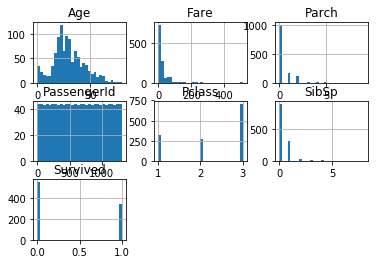

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891


In [55]:
# 3) Numerical summary 
print(titanic_df.describe())

# 4) Graphical distributions of values
import matplotlib.pyplot as plt
%matplotlib inline
titanic_df.hist(bins=30)
plt.show()

surv_sex_class = pd.crosstab(index=titanic_train["Survived"],    # frequency table (crosstab)
                             columns=[titanic_train["Pclass"],
                                      titanic_train["Sex"]],
                             margins=True)
print(surv_sex_class)


# Data Cleansing  
**Are there missing values in each column? If so, is it possible to impute the missing data in a reasonable way? Discard all passengers with incomplete information may significantly reduce the number of data example. **  

We should use different methods to handle the missing data according to the nature of the variable:  
1) If a variable only has a tiny fraction of values, a common practice is imputing with mean or median value among passengers belonging to the same group.  
2) If most values for a variable are missing, it is usually better to simply discard this feature. Please go through all variables and handle the missing values.  

**What was done for missing values by column:**  
Age: Average age of men in class 3 is 29.75. Average age of men in class 2 is 30.04. Average age of men in class 1 is 32.9. Average age of women in class 3 is 26.96. Average age of women in class 2 is 27.91. Average age of women in class 1 is 32.82. These values were assigned for missing values with respect to passenger class.  

Cabin: Removed from dataframe since over 1000 values were missing.  

Embarked: There were only two missing values; since roughly 70% of the passengers embarked at S, S was entered as their port of embarkation.  

Fare: One person was missing a fare. Since he was middle class, the fare was replaced by the average fare for the middle class (not counting outliers).  

  
Survived: A woman in the upper and middle classes most likely survived; values changed to 1. A man in the lower and middle classes most likely died; values changed to 0. Half of the women died and half the women survived in the lower class; randomly assigned half the cells to 0 and the other half to 1 (with age in consideration). About 2/3 of the men in the upper class died while about 1/3 survived; randomly assigned 1/3 of the cells to 1 and 2/3 of the cells to 0 (with age in consideration). Children are more likely to survive than adults; all children (less than 18 years old) changed to 1. All predictions based on frequency table.



**Are there outliers? If so, decide whether these values should be removed.**  
There are many outliers for the fare column; all values over 40. Especially because most of the passengers who paid over 40 were middle or lower class. They are also considered outliers because most of the passengers who paid this much were traveling with SibSp and Parch close to 0. Since the cabin numbers range from A to E and most are missing, we cannot determine if a higher cost corresponded to a nicer cabin.  

The fares will be replaced by the median (14.45) of the fares.

In [64]:
titanic = pd.read_csv(datapath + 'titanic.csv', thousands=',', delimiter=',') # updated CSv file with all changes
titanic.drop('Cabin',1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.0,C
2,3,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.0,S
4,5,0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,S
